In [1]:
import warnings
warnings.filterwarnings("ignore")

## for data
import pandas as pd  #1.1.5

## for plotting
import matplotlib.pyplot as plt  #3.3.2
import seaborn as sns  #0.11.1

## for text
import nltk  #3.8.1
import re   
import contractions  #0.1.73

## for nlp
import spacy  #3.5.0
from spacy import displacy

## for graph
import networkx as nx  #3.0
import plotly.graph_objs as go  #5.1.0

## for timeline
import dateparser #1.1.7

2023-03-31 18:09:27.206612: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-31 18:09:29.362724: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /shared/centos7/cuda/11.2/lib64:/shared/centos7/anaconda3/2022.05/lib:/shared/centos7/nodejs/14.15.4/lib:/home/patel.ayushj/.conda/envs/nlp-tf/lib/
2023-03-31 18:09:29.362928: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory;

In [2]:
from nlp_utils import *

In [3]:
data = pd.read_csv('Wikipedia-Level-4-Articles-Cleaned-2.csv')

In [4]:
data = data.drop(['Unnamed: 0',], axis = 1)

In [5]:
# # Define the categories you want to select
# categories = ["People", "Arts", "History", "Biology_and_health_sciences", "Everyday_life", "Geography", "Philosophy_and_religion", "Society_and_social_sciences"]

# # Create an empty list to store the selected rows
# selected_rows = []

# # Loop through each category and select 30 rows
# for category in categories:
#     category_rows = data[data["Category"] == category].head(30)
#     selected_rows.append(category_rows)

# # Concatenate all the selected rows into a new dataframe
# data = pd.concat(selected_rows)

In [6]:
data

Title  \
0                   Masaccio   
1                    Hokusai   
2           Steven Spielberg   
3                Che Guevara   
4      Jöns Jacob Berzelius   
...                      ...   
10004               Zimbabwe   
10005                   Nile   
10006    Republic of Ireland   
10007              Lake Erie   
10008               Kattegat   

                                                 Article   Category  \
0      Masaccio (UK: , US: , Italian: [maˈzattʃo]; De...     People   
1      Katsushika Hokusai (葛飾 北斎, c. 31 October 1760 ...     People   
2      Steven Allan Spielberg  (; born December 18, 1...     People   
3      Ernesto "Che" Guevara (Spanish: [ˈtʃe ɣeˈβaɾa]...     People   
4      Baron Jöns Jacob Berzelius (Swedish: [jœns ˈjɑ...     People   
...                                                  ...        ...   
10004  Zimbabwe (), officially the Republic of Zimbab...  Geography   
10005  The Nile is a major north-flowing river in nor...  Geography   
10006  Ireland (Irish: Éire [ˈeːɾʲə] (listen)), also ...  Geography   
10007  Lake Erie ( "eerie") is the fourth largest lak...  Geography   
10008  The Kattegat (Danish: [ˈkʰætəkæt]; Swedish: Ka...  Geography   

                                                 Summary  \
0      Masaccio (UK: , US: , Italian: [maˈzattʃo]; De...   
1      Katsushika Hokusai (葛飾 北斎, c. 31 October 1760 ...   
2      Steven Allan Spielberg  (; born December 18, 1...   
3      Ernesto "Che" Guevara (Spanish: [ˈtʃe ɣeˈβaɾa]...   
4      Baron Jöns Jacob Berzelius (Swedish: [jœns ˈjɑ...   
...                                                  ...   
10004  Zimbabwe (), officially the Republic of Zimbab...   
10005  The Nile is a major north-flowing river in nor...   
10006  Ireland (Irish: Éire [ˈeːɾʲə] (listen)), also ...   
10007  Lake Erie ( "eerie") is the fourth largest lak...   
10008  The Kattegat (Danish: [ˈkʰætəkæt]; Swedish: Ka...   

                                           Article_clean  \
0      masaccio italian decemb 1401 summer 1428 born ...   
1      katsushika hokusai octob 1760 may 1849 known s...   
2      steven allan spielberg born decemb 1946 americ...   
3      ernesto che guevara spanish june 1928 octob 19...   
4      baron jacob berzeliu swedish contemporari name...   
...                                                  ...   
10004  zimbabw offici republ zimbabw landlock countri...   
10005  nile major northflow river northeastern africa...   
10006  ireland irish listen also known republ ireland...   
10007  lake eri eeri fourth largest lake surfac area ...   
10008  kattegat danish swedish kattegatt 30000 km2 12...   

                                           Summary_clean  
0      masaccio italian december 1401 summer 1428 bor...  
1      katsushika hokusai october 1760 may 1849 known...  
2      steven allan spielberg born december 1946 amer...  
3      ernesto che guevara spanish june 1928 october ...  
4      baron jacob berzelius swedish contemporary nam...  
...                                                  ...  
10004  zimbabwe officially republic zimbabwe landlock...  
10005  nile major northflowing river northeastern afr...  
10006  ireland irish listen also known republic irela...  
10007  lake erie eerie fourth largest lake surface ar...  
10008  kattegat danish swedish kattegatt 30000 km2 12...  

[10009 rows x 6 columns]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10009 entries, 0 to 10008
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          10009 non-null  object
 1   Article        10009 non-null  object
 2   Category       10009 non-null  object
 3   Summary        10009 non-null  object
 4   Article_clean  10009 non-null  object
 5   Summary_clean  10009 non-null  object
dtypes: object(6)
memory usage: 469.3+ KB


In [8]:
def plot_distributions(data, x, max_cat=20, top=None, y=None, bins=None, figsize=(10,5)):
    ## univariate
    if y is None:
        fig, ax = plt.subplots(figsize=figsize)
        fig.suptitle(x, fontsize=15)
        ### categorical
        if data[x].nunique() <= max_cat:
            if top is None:
                data[x].reset_index().groupby(x).count().sort_values(by="index").plot(kind="barh", legend=False, ax=ax).grid(axis='x')
            else:   
                data[x].reset_index().groupby(x).count().sort_values(by="index").tail(top).plot(kind="barh", legend=False, ax=ax).grid(axis='x')
            ax.set(ylabel=None)
        ### numerical
        else:
            sns.distplot(data[x], hist=True, kde=True, kde_kws={"shade":True}, ax=ax)
            ax.grid(True)
            ax.set(xlabel=None, yticklabels=[], yticks=[])

    ## bivariate
    else:
        fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=figsize)
        fig.suptitle(x, fontsize=15)
        for i in data[y].unique():
            sns.distplot(data[data[y]==i][x], hist=True, kde=False, bins=bins, hist_kws={"alpha":0.8}, axlabel="", ax=ax[0])
            sns.distplot(data[data[y]==i][x], hist=False, kde=True, kde_kws={"shade":True}, axlabel="", ax=ax[1])
        ax[0].set(title="histogram")
        ax[0].grid(True)
        ax[0].legend(data[y].unique())
        ax[1].set(title="density")
        ax[1].grid(True)
    plt.show()

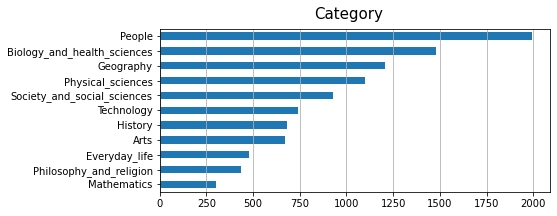

In [9]:
plot_distributions(data, x = "Category", top = None, figsize = (7,3))

In [10]:
def add_detect_lang(data, column):
    data = data.copy()
    data['lang'] = data[column].apply(lambda x: langdetect.detect(x) if x.strip() != "" else "")
    return data

In [11]:
# This takes a while
data = add_detect_lang(data, "Article")
data.head()

Title                                            Article  \
0               Masaccio  Masaccio (UK: , US: , Italian: [maˈzattʃo]; De...   
1                Hokusai  Katsushika Hokusai (葛飾 北斎, c. 31 October 1760 ...   
2       Steven Spielberg  Steven Allan Spielberg  (; born December 18, 1...   
3            Che Guevara  Ernesto "Che" Guevara (Spanish: [ˈtʃe ɣeˈβaɾa]...   
4  Jöns Jacob Berzelius  Baron Jöns Jacob Berzelius (Swedish: [jœns ˈjɑ...   

  Category                                            Summary  \
0   People  Masaccio (UK: , US: , Italian: [maˈzattʃo]; De...   
1   People  Katsushika Hokusai (葛飾 北斎, c. 31 October 1760 ...   
2   People  Steven Allan Spielberg  (; born December 18, 1...   
3   People  Ernesto "Che" Guevara (Spanish: [ˈtʃe ɣeˈβaɾa]...   
4   People  Baron Jöns Jacob Berzelius (Swedish: [jœns ˈjɑ...   

                                       Article_clean  \
0  masaccio italian decemb 1401 summer 1428 born ...   
1  katsushika hokusai octob 1760 may 1849 known s...   
2  steven allan spielberg born decemb 1946 americ...   
3  ernesto che guevara spanish june 1928 octob 19...   
4  baron jacob berzeliu swedish contemporari name...   

                                       Summary_clean lang  
0  masaccio italian december 1401 summer 1428 bor...   en  
1  katsushika hokusai october 1760 may 1849 known...   en  
2  steven allan spielberg born december 1946 amer...   en  
3  ernesto che guevara spanish june 1928 october ...   en  
4  baron jacob berzelius swedish contemporary nam...   en

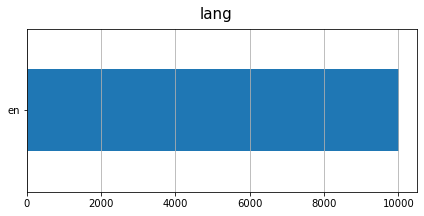

In [12]:
plot_distributions(data, x = "lang", top = 5, figsize = (7,3))

In [13]:
!python -m spacy download en_core_web_lg

2023-03-31 18:15:25.197076: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-31 18:15:27.429556: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /shared/centos7/cuda/11.2/lib64:/shared/centos7/anaconda3/2022.05/lib:/shared/centos7/nodejs/14.15.4/lib:/home/patel.ayushj/.conda/envs/nlp-tf/lib/
2023-03-31 18:15:27.429700: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory;

In [14]:
ner = spacy.load("en_core_web_lg")

In [15]:
lst_tag_type = ["ORG","PERSON","NORP","GPE","LOC","FAC","EVENT","PRODUCT","WORK_OF_ART"]

In [16]:
def ner_displacy(txt, ner=None, lst_tag_filter=None, title=None, serve=False):
    ner = spacy.load("en_core_web_lg") if ner is None else ner
    doc = ner(txt)
    doc.user_data["title"] = title
    if serve == True:
        spacy.displacy.serve(doc, style="ent", options={"ents":lst_tag_filter})
    else:
        spacy.displacy.render(doc, style="ent", options={"ents":lst_tag_filter})

In [17]:
ner_displacy(data["Summary"].iloc[0], ner, lst_tag_type, title = "Example")

In [18]:
def utils_ner_text(txt, ner=None, lst_tag_filter=None, grams_join="_"):
    ## apply model
    ner = spacy.load("en_core_web_lg") if ner is None else ner
    entities = ner(txt).ents

    ## tag text
    tagged_txt = txt
    for tag in entities:
        if (lst_tag_filter is None) or (tag.label_ in lst_tag_filter):
            try:
                tagged_txt = re.sub(tag.text, grams_join.join(tag.text.split()), tagged_txt)
            except Exception as e:
                continue

    ## extract tags list
    if lst_tag_filter is None:
        lst_tags = [(tag.text, tag.label_) for tag in entities]  
    else: 
        lst_tags = [(word.text, word.label_) for word in entities if word.label_ in lst_tag_filter]

    return tagged_txt, lst_tags

In [19]:
# example of replacing text and tags extraction
utils_ner_text(data["Summary"].iloc[0], ner, lst_tag_type, grams_join = "_")

('Masaccio (UK: , US: , Italian: [maˈzattʃo]; December 21, 1401 – summer 1428), born Tommaso_di Ser Giovanni di Simone, was a Florentine artist who is regarded as the first great Italian painter of the Quattrocento period of the_Italian_Renaissance. According to Vasari, Masaccio was the best painter of his generation because of his skill at imitating nature, recreating lifelike figures and movements as well as a convincing sense of three-dimensionality. He employed nudes and foreshortenings in his figures. This had seldom been done before him.The name Masaccio is a humorous version of Maso (short for Tommaso), meaning "clumsy" or "messy" Tom. The name may have been created to distinguish him from his principal collaborator, also called Maso, who came to be known as Masolino ("little/delicate Tom").\nDespite his brief career, he had a profound influence on other artists and is considered to have started the Early Italian Renaissance in painting with his works in the mid- and late-1420s.

In [20]:
def add_ner_spacy(data, column, ner=None, lst_tag_filter=None, grams_join="_", create_features=True):
    ner = spacy.load("en_core_web_lg") if ner is None else ner
    data = data.copy()

    ## tag text and exctract tags
    print("--- tagging ---")
    data[[column+"_tagged", "tags"]] = data[[column]].apply(lambda x: utils_ner_text(x[0], ner, lst_tag_filter, grams_join), 
                                                          axis=1, result_type='expand')

    ## put all tags in a column
    print("--- counting tags ---")
    data["tags"] = data["tags"].apply(lambda x: utils_lst_count(x, top=None))
    
    ## extract features
    if create_features == True:
        print("--- creating features ---")
        ### features set
        tags_set = []
        for lst in data["tags"].tolist():
            for dic in lst:
                for k in dic.keys():
                    tags_set.append(k[1])
        tags_set = list(set(tags_set))
        ### create columns
        for feature in tags_set:
            data["tags_"+feature] = data["tags"].apply(lambda x: utils_ner_features(x, feature))
    return data

In [21]:
# This takes a while to run
data = add_ner_spacy(data, "Summary", ner, lst_tag_type, grams_join = "_", create_features = True)
data.head()

--- tagging ---
--- counting tags ---
--- creating features ---


Title                                            Article  \
0               Masaccio  Masaccio (UK: , US: , Italian: [maˈzattʃo]; De...   
1                Hokusai  Katsushika Hokusai (葛飾 北斎, c. 31 October 1760 ...   
2       Steven Spielberg  Steven Allan Spielberg  (; born December 18, 1...   
3            Che Guevara  Ernesto "Che" Guevara (Spanish: [ˈtʃe ɣeˈβaɾa]...   
4  Jöns Jacob Berzelius  Baron Jöns Jacob Berzelius (Swedish: [jœns ˈjɑ...   

  Category                                            Summary  \
0   People  Masaccio (UK: , US: , Italian: [maˈzattʃo]; De...   
1   People  Katsushika Hokusai (葛飾 北斎, c. 31 October 1760 ...   
2   People  Steven Allan Spielberg  (; born December 18, 1...   
3   People  Ernesto "Che" Guevara (Spanish: [ˈtʃe ɣeˈβaɾa]...   
4   People  Baron Jöns Jacob Berzelius (Swedish: [jœns ˈjɑ...   

                                       Article_clean  \
0  masaccio italian decemb 1401 summer 1428 born ...   
1  katsushika hokusai octob 1760 may 1849 known s...   
2  steven allan spielberg born decemb 1946 americ...   
3  ernesto che guevara spanish june 1928 octob 19...   
4  baron jacob berzeliu swedish contemporari name...   

                                       Summary_clean lang  \
0  masaccio italian december 1401 summer 1428 bor...   en   
1  katsushika hokusai october 1760 may 1849 known...   en   
2  steven allan spielberg born december 1946 amer...   en   
3  ernesto che guevara spanish june 1928 october ...   en   
4  baron jacob berzelius swedish contemporary nam...   en   

                                      Summary_tagged  \
0  Masaccio (UK: , US: , Italian: [maˈzattʃo]; De...   
1  Katsushika_Hokusai (葛飾 北斎, c. 31 October 1760 ...   
2  Steven Allan Spielberg  (; born December 18, 1...   
3  Ernesto "Che" Guevara (Spanish: [ˈtʃe ɣeˈβaɾa]...   
4  Baron Jöns_Jacob_Berzelius (Swedish: [jœns_ˈjɑ...   

                                                tags  tags_PERSON  \
0  [{('Masaccio', 'PERSON'): 5}, {('Italian', 'NO...           14   
1  [{('Hokusai', 'PERSON'): 6}, {('Mount Fuji', '...            9   
2  [{('Spielberg', 'PERSON'): 5}, {('Jaws', 'WORK...            9   
3  [{('Guevara', 'PERSON'): 9}, {('Cuba', 'GPE'):...           17   
4  [{('Berzelius', 'PERSON'): 8}, {('Swedish', 'N...           15   

   tags_PRODUCT  tags_EVENT  tags_LOC  tags_GPE  tags_FAC  tags_ORG  \
0             1           0         1         2         0         3   
1             1           0         4         3         0         2   
2             0           2         0         9         1        15   
3             0           3         4        10         0         9   
4             0           0         0         1         0         2   

   tags_NORP  tags_WORK_OF_ART  
0          3                 0  
1          1                 2  
2          1                11  
3          7                 0  
4          4                 0

In [22]:
# Check
i = 0
print(data["Summary"].iloc[i], " --> ")
print(data["Summary_tagged"].iloc[i])
print("tags:")
data["tags"].iloc[i]

Masaccio (UK: , US: , Italian: [maˈzattʃo]; December 21, 1401 – summer 1428), born Tommaso di Ser Giovanni di Simone, was a Florentine artist who is regarded as the first great Italian painter of the Quattrocento period of the Italian Renaissance. According to Vasari, Masaccio was the best painter of his generation because of his skill at imitating nature, recreating lifelike figures and movements as well as a convincing sense of three-dimensionality. He employed nudes and foreshortenings in his figures. This had seldom been done before him.The name Masaccio is a humorous version of Maso (short for Tommaso), meaning "clumsy" or "messy" Tom. The name may have been created to distinguish him from his principal collaborator, also called Maso, who came to be known as Masolino ("little/delicate Tom").
Despite his brief career, he had a profound influence on other artists and is considered to have started the Early Italian Renaissance in painting with his works in the mid- and late-1420s. He

[{('Masaccio', 'PERSON'): 5},
 {('Italian', 'NORP'): 2},
 {('Tom', 'PERSON'): 2},
 {('UK', 'GPE'): 1},
 {('US', 'GPE'): 1},
 {('maˈzattʃo', 'PERSON'): 1},
 {('Tommaso di', 'PERSON'): 1},
 {('Florentine', 'NORP'): 1},
 {('Quattrocento', 'PRODUCT'): 1},
 {('the Italian Renaissance', 'ORG'): 1},
 {('Vasari', 'PERSON'): 1},
 {('Maso', 'LOC'): 1},
 {('Tommaso', 'PERSON'): 1},
 {('Maso', 'ORG'): 1},
 {('Masolino', 'PERSON'): 1},
 {('International Gothic', 'ORG'): 1},
 {('Gentile da Fabriano', 'PERSON'): 1},
 {('Filippo Brunelleschi', 'PERSON'): 1}]

In [23]:
def tags_freq(tags, top=30, figsize=(10,5)):   
    tags_list = tags.sum()
    map_lst = list(map(lambda x: list(x.keys())[0], tags_list))
    data_tags = pd.DataFrame(map_lst, columns=['tag','type'])
    data_tags["count"] = 1
    data_tags = data_tags.groupby(['type','tag']).count().reset_index().sort_values("count", ascending=False)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle("Top frequent tags", fontsize = 12)
    sns.barplot(x = "count", y="tag", hue="type", data = data_tags.iloc[:top,:], dodge = False, ax = ax)
    ax.set(ylabel = None)
    ax.grid(axis = "x")
    plt.show()
    return data_tags

# People:


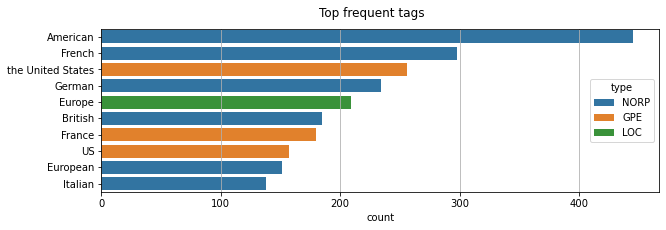

# Society_and_social_sciences:


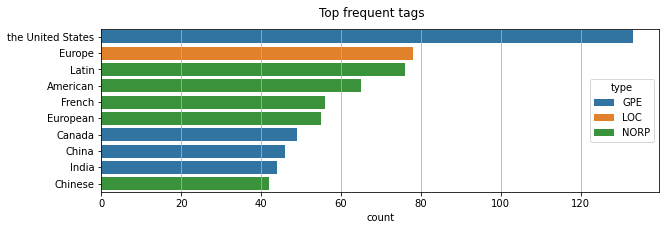

# Arts:


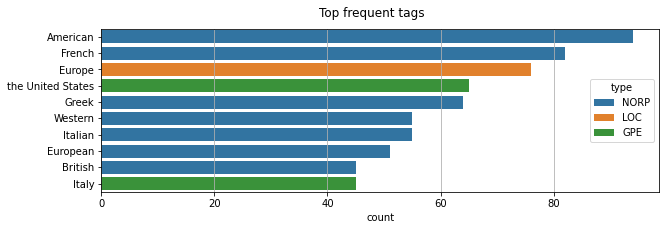

# Everyday_life:


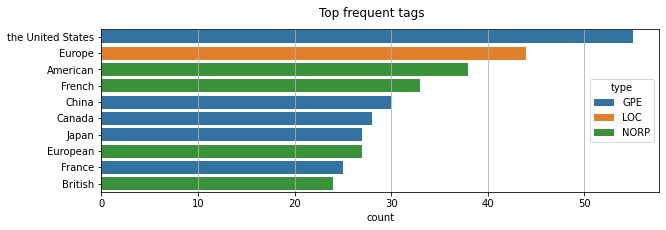

# Biology_and_health_sciences:


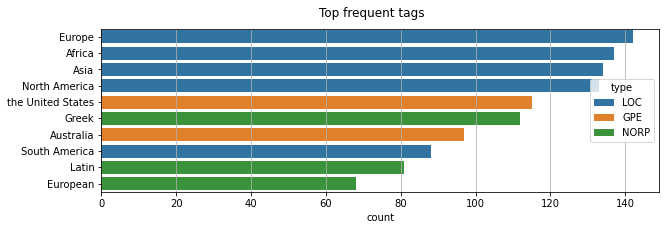

# Physical_sciences:


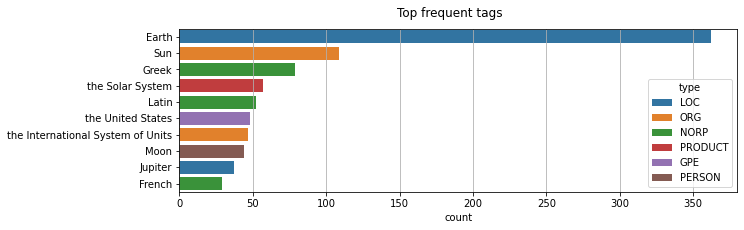

# Philosophy_and_religion:


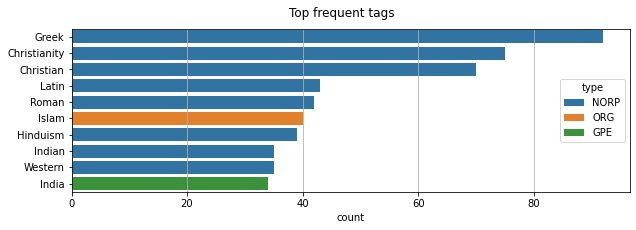

# History:


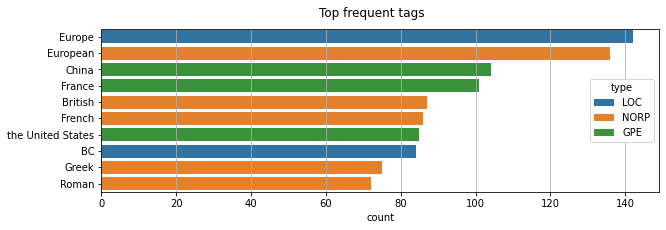

# Technology:


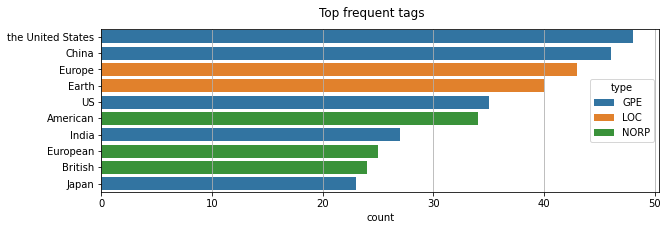

# Mathematics:


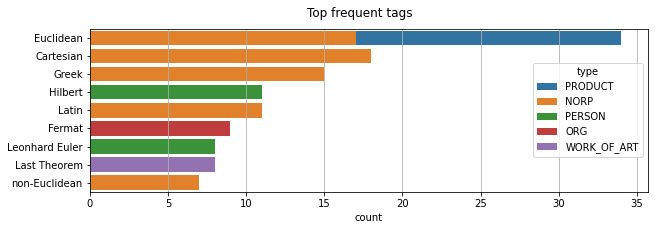

# Geography:


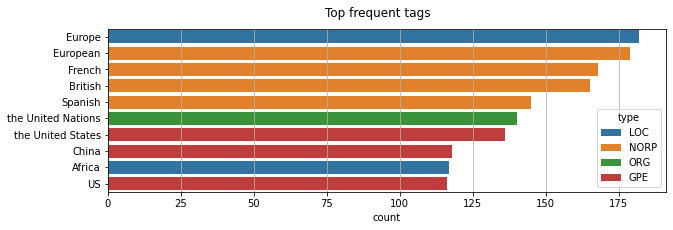

In [24]:
for y in data["Category"].unique():
    print("# {}:".format(y))
    common_tags = tags_freq(tags = data[data["Category"]== y]["tags"], top = 10, figsize = (10,3))

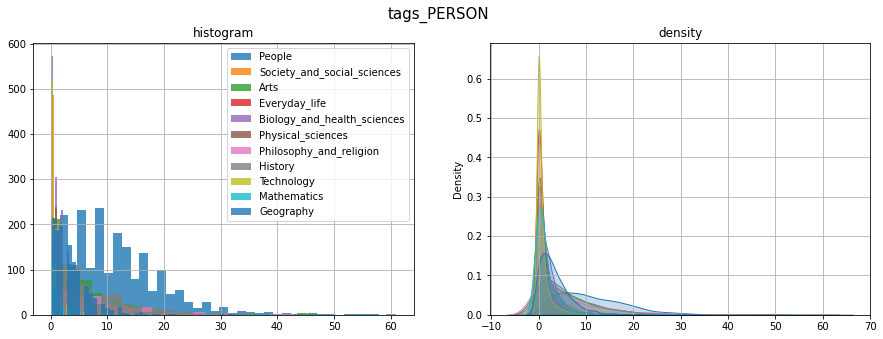

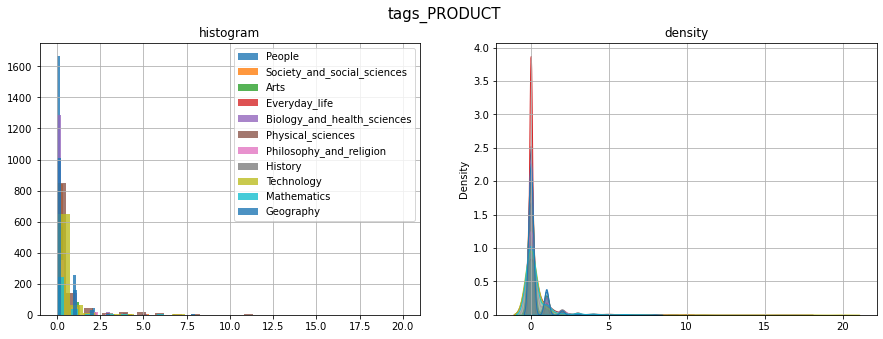

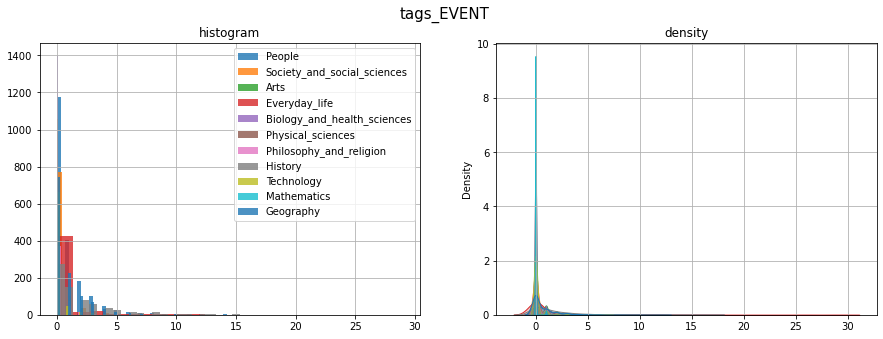

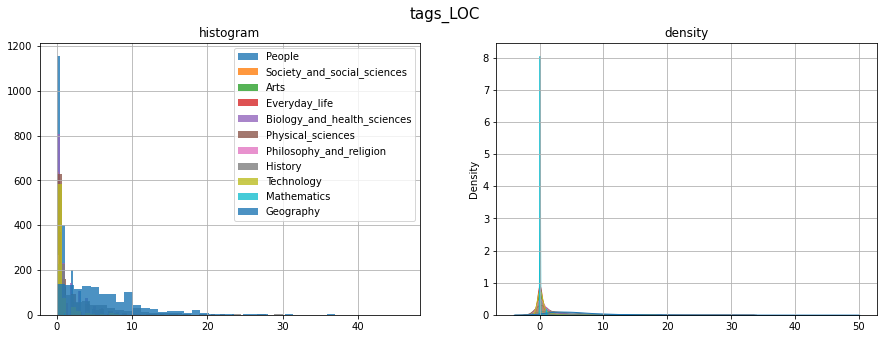

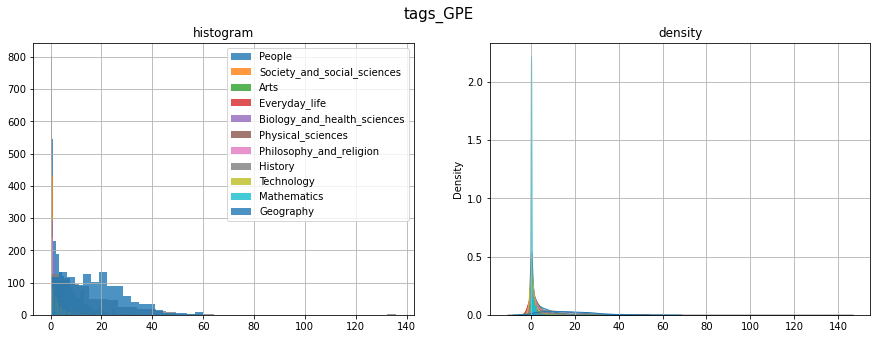

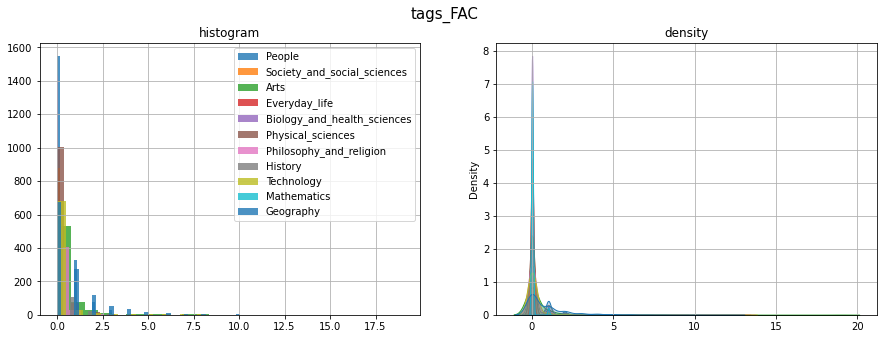

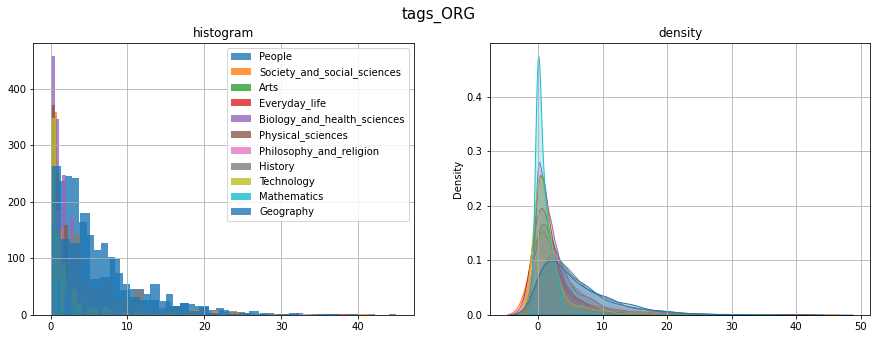

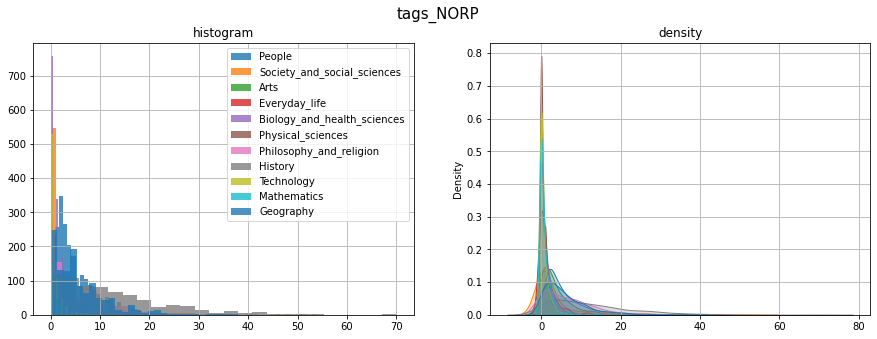

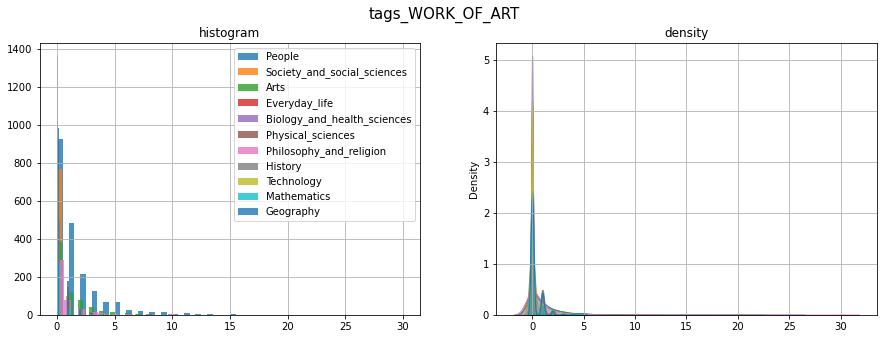

In [25]:
# Tags bivariate distribution
for x in data.filter(like = "tags_", axis = 1).columns:
    plot_distributions(data, x = x, y = "Category", bins = None, figsize = (15,5))

In [26]:
def add_text_length(data, column):
    data = data.copy()
    data['word_count'] = data[column].apply(lambda x: len(nltk.word_tokenize(str(x))) )
    data['char_count'] = data[column].apply(lambda x: sum(len(word) for word in nltk.word_tokenize(str(x))) )
    data['sentence_count'] = data[column].apply(lambda x: len(nltk.sent_tokenize(str(x))) )
    data['avg_word_length'] = data['char_count'] / data['word_count']
    data['avg_sentence_lenght'] = data['word_count'] / data['sentence_count']
    print(data[['char_count','word_count','sentence_count','avg_word_length','avg_sentence_lenght']].describe().T[["min","mean","max"]])
    return data

In [27]:
data = add_text_length(data, "Article_clean")
data.head()

                            min          mean           max
char_count           421.000000  19482.671296  126076.00000
word_count            60.000000   3371.737236   21625.00000
sentence_count         1.000000      1.000000       1.00000
avg_word_length        4.719607      5.786694       8.22809
avg_sentence_lenght   60.000000   3371.737236   21625.00000


Title                                            Article  \
0               Masaccio  Masaccio (UK: , US: , Italian: [maˈzattʃo]; De...   
1                Hokusai  Katsushika Hokusai (葛飾 北斎, c. 31 October 1760 ...   
2       Steven Spielberg  Steven Allan Spielberg  (; born December 18, 1...   
3            Che Guevara  Ernesto "Che" Guevara (Spanish: [ˈtʃe ɣeˈβaɾa]...   
4  Jöns Jacob Berzelius  Baron Jöns Jacob Berzelius (Swedish: [jœns ˈjɑ...   

  Category                                            Summary  \
0   People  Masaccio (UK: , US: , Italian: [maˈzattʃo]; De...   
1   People  Katsushika Hokusai (葛飾 北斎, c. 31 October 1760 ...   
2   People  Steven Allan Spielberg  (; born December 18, 1...   
3   People  Ernesto "Che" Guevara (Spanish: [ˈtʃe ɣeˈβaɾa]...   
4   People  Baron Jöns Jacob Berzelius (Swedish: [jœns ˈjɑ...   

                                       Article_clean  \
0  masaccio italian decemb 1401 summer 1428 born ...   
1  katsushika hokusai octob 1760 may 1849 known s...   
2  steven allan spielberg born decemb 1946 americ...   
3  ernesto che guevara spanish june 1928 octob 19...   
4  baron jacob berzeliu swedish contemporari name...   

                                       Summary_clean lang  \
0  masaccio italian december 1401 summer 1428 bor...   en   
1  katsushika hokusai october 1760 may 1849 known...   en   
2  steven allan spielberg born december 1946 amer...   en   
3  ernesto che guevara spanish june 1928 october ...   en   
4  baron jacob berzelius swedish contemporary nam...   en   

                                      Summary_tagged  \
0  Masaccio (UK: , US: , Italian: [maˈzattʃo]; De...   
1  Katsushika_Hokusai (葛飾 北斎, c. 31 October 1760 ...   
2  Steven Allan Spielberg  (; born December 18, 1...   
3  Ernesto "Che" Guevara (Spanish: [ˈtʃe ɣeˈβaɾa]...   
4  Baron Jöns_Jacob_Berzelius (Swedish: [jœns_ˈjɑ...   

                                                tags  tags_PERSON  ...  \
0  [{('Masaccio', 'PERSON'): 5}, {('Italian', 'NO...           14  ...   
1  [{('Hokusai', 'PERSON'): 6}, {('Mount Fuji', '...            9  ...   
2  [{('Spielberg', 'PERSON'): 5}, {('Jaws', 'WORK...            9  ...   
3  [{('Guevara', 'PERSON'): 9}, {('Cuba', 'GPE'):...           17  ...   
4  [{('Berzelius', 'PERSON'): 8}, {('Swedish', 'N...           15  ...   

   tags_GPE  tags_FAC  tags_ORG  tags_NORP  tags_WORK_OF_ART  word_count  \
0         2         0         3          3                 0        1446   
1         3         0         2          1                 2        1765   
2         9         1        15          1                11        6839   
3        10         0         9          7                 0        9092   
4         1         0         2          4                 0        1649   

   char_count  sentence_count  avg_word_length  avg_sentence_lenght  
0        8509               1         5.884509               1446.0  
1        9829               1         5.568839               1765.0  
2       38874               1         5.684164               6839.0  
3       52569               1         5.781896               9092.0  
4       10091               1         6.119466               1649.0  

[5 rows x 23 columns]

In [28]:
# Check
i = 0
print(data["Article_clean"].iloc[i], " --> ")
for col in ["word_count","char_count","sentence_count","avg_word_length","avg_sentence_lenght"]:
    print(col+":", data[col].iloc[i])

masaccio italian decemb 1401 summer 1428 born tommaso ser giovanni simon florentin artist regard first great italian painter quattrocento period italian renaiss accord vasari masaccio best painter gener becaus skill imit natur recreat lifelik figur movement well convinc sen threedimension employ nude foreshorten figur thi seldom done befor name masaccio humor version maso short tommaso mean clumsi messi tom name may creat distinguish princip collabor also call maso came known masolino littledel tom despit brief career profound influenc artist consid start earli italian renaiss paint work mid late1420 one first use linear perspect paint employ techniqu vanish point art first time move away intern gothic style elabor ornament artist like gentil fabriano naturalist mode employ perspect chiaroscuro greater realism masaccio die age twentysix littl known exact circumst death upon hear masaccio death filippo brunelleschi said suffer great loss earli life masaccio born giovanni simon cassai ja

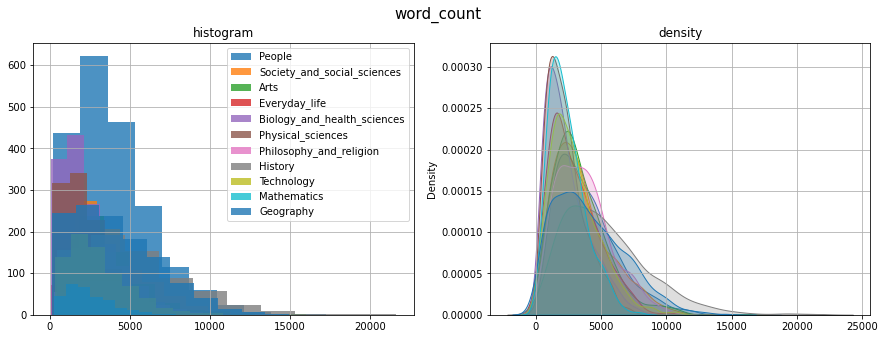

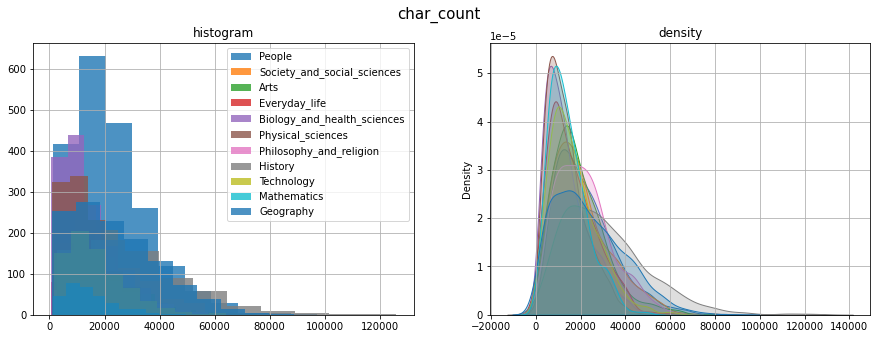

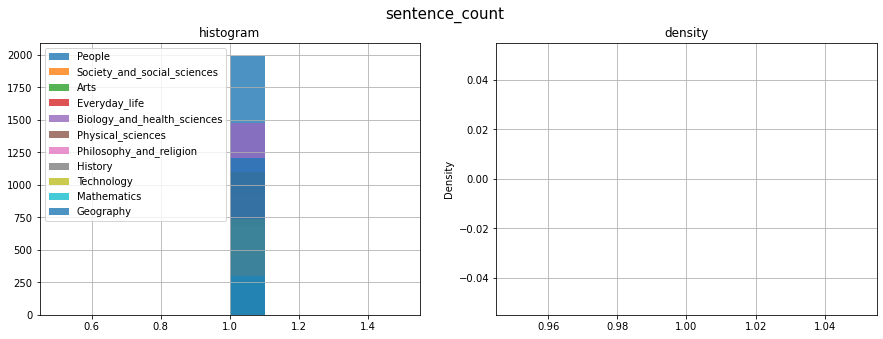

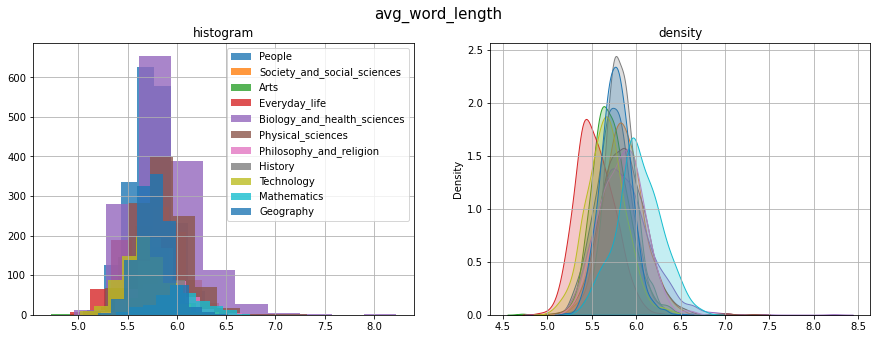

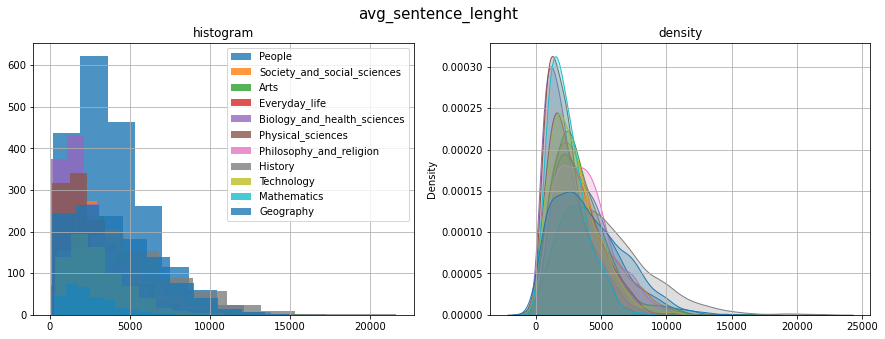

In [29]:
for col in ["word_count","char_count","sentence_count","avg_word_length","avg_sentence_lenght"]:
    plot_distributions(data, x = col, y = "Category", bins = 10, figsize = (15,5))

In [30]:
def add_sentiment(data, column, algo="vader", sentiment_range=(-1,1)):
    data = data.copy()
    ## calculate sentiment
    if algo == "vader":
        vader = SentimentIntensityAnalyzer()
        data["sentiment"] = data[column].apply(lambda x: vader.polarity_scores(x)["compound"])
    elif algo == "textblob":
        data["sentiment"] = data[column].apply(lambda x: TextBlob(x).sentiment.polarity)
    ## rescaled
    if sentiment_range != (-1,1):
        data["sentiment"] = preprocessing.MinMaxScaler(feature_range=sentiment_range).fit_transform(data[["sentiment"]])
    print(data[['sentiment']].describe().T)
    return data

In [31]:
data = add_sentiment(data, "Article_clean", algo = "textblob", sentiment_range = (-1,1))
data.head()

             count      mean       std       min       25%       50%  \
sentiment  10009.0  0.046798  0.053291 -0.374181  0.017947  0.045832   

                75%       max  
sentiment  0.075075  0.396861  


Title                                            Article  \
0               Masaccio  Masaccio (UK: , US: , Italian: [maˈzattʃo]; De...   
1                Hokusai  Katsushika Hokusai (葛飾 北斎, c. 31 October 1760 ...   
2       Steven Spielberg  Steven Allan Spielberg  (; born December 18, 1...   
3            Che Guevara  Ernesto "Che" Guevara (Spanish: [ˈtʃe ɣeˈβaɾa]...   
4  Jöns Jacob Berzelius  Baron Jöns Jacob Berzelius (Swedish: [jœns ˈjɑ...   

  Category                                            Summary  \
0   People  Masaccio (UK: , US: , Italian: [maˈzattʃo]; De...   
1   People  Katsushika Hokusai (葛飾 北斎, c. 31 October 1760 ...   
2   People  Steven Allan Spielberg  (; born December 18, 1...   
3   People  Ernesto "Che" Guevara (Spanish: [ˈtʃe ɣeˈβaɾa]...   
4   People  Baron Jöns Jacob Berzelius (Swedish: [jœns ˈjɑ...   

                                       Article_clean  \
0  masaccio italian decemb 1401 summer 1428 born ...   
1  katsushika hokusai octob 1760 may 1849 known s...   
2  steven allan spielberg born decemb 1946 americ...   
3  ernesto che guevara spanish june 1928 octob 19...   
4  baron jacob berzeliu swedish contemporari name...   

                                       Summary_clean lang  \
0  masaccio italian december 1401 summer 1428 bor...   en   
1  katsushika hokusai october 1760 may 1849 known...   en   
2  steven allan spielberg born december 1946 amer...   en   
3  ernesto che guevara spanish june 1928 october ...   en   
4  baron jacob berzelius swedish contemporary nam...   en   

                                      Summary_tagged  \
0  Masaccio (UK: , US: , Italian: [maˈzattʃo]; De...   
1  Katsushika_Hokusai (葛飾 北斎, c. 31 October 1760 ...   
2  Steven Allan Spielberg  (; born December 18, 1...   
3  Ernesto "Che" Guevara (Spanish: [ˈtʃe ɣeˈβaɾa]...   
4  Baron Jöns_Jacob_Berzelius (Swedish: [jœns_ˈjɑ...   

                                                tags  tags_PERSON  ...  \
0  [{('Masaccio', 'PERSON'): 5}, {('Italian', 'NO...           14  ...   
1  [{('Hokusai', 'PERSON'): 6}, {('Mount Fuji', '...            9  ...   
2  [{('Spielberg', 'PERSON'): 5}, {('Jaws', 'WORK...            9  ...   
3  [{('Guevara', 'PERSON'): 9}, {('Cuba', 'GPE'):...           17  ...   
4  [{('Berzelius', 'PERSON'): 8}, {('Swedish', 'N...           15  ...   

   tags_FAC  tags_ORG  tags_NORP  tags_WORK_OF_ART  word_count  char_count  \
0         0         3          3                 0        1446        8509   
1         0         2          1                 2        1765        9829   
2         1        15          1                11        6839       38874   
3         0         9          7                 0        9092       52569   
4         0         2          4                 0        1649       10091   

   sentence_count  avg_word_length  avg_sentence_lenght  sentiment  
0               1         5.884509               1446.0   0.088162  
1               1         5.568839               1765.0   0.146711  
2               1         5.684164               6839.0   0.150125  
3               1         5.781896               9092.0   0.045832  
4               1         6.119466               1649.0   0.103661  

[5 rows x 24 columns]

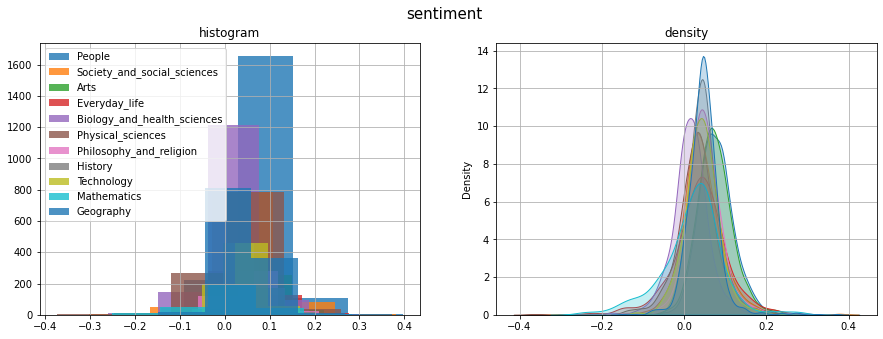

In [32]:
plot_distributions(data, x = "sentiment", y = "Category", bins = 5, figsize = (15,5))

In [33]:
# I'll give a range of 0-1 to the sentiment
data = add_sentiment(data, "Article_clean", algo = "textblob", sentiment_range = (0,1))

             count      mean       std  min       25%       50%       75%  max
sentiment  10009.0  0.545986  0.069116  0.0  0.508568  0.544734  0.582661  1.0


# People:


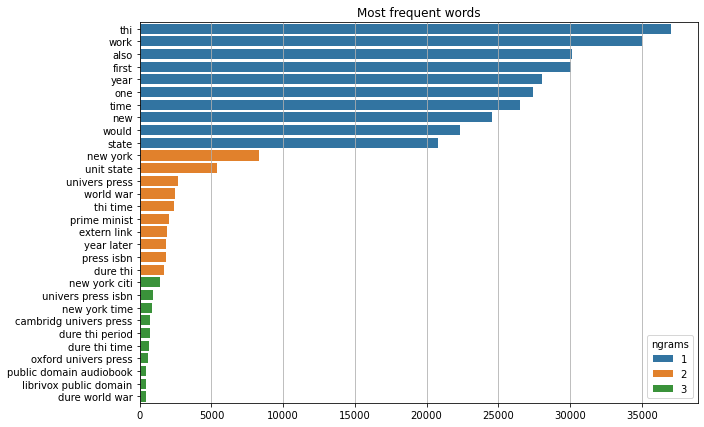

# Society_and_social_sciences:


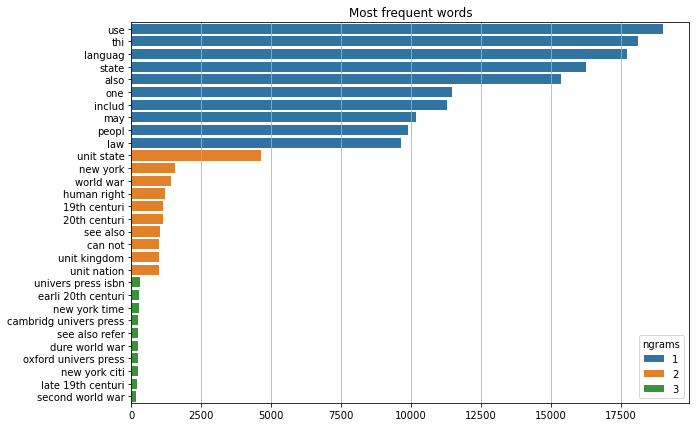

# Arts:


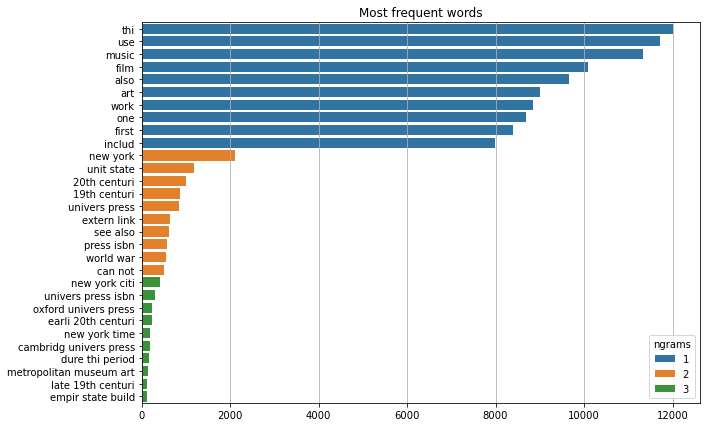

# Everyday_life:


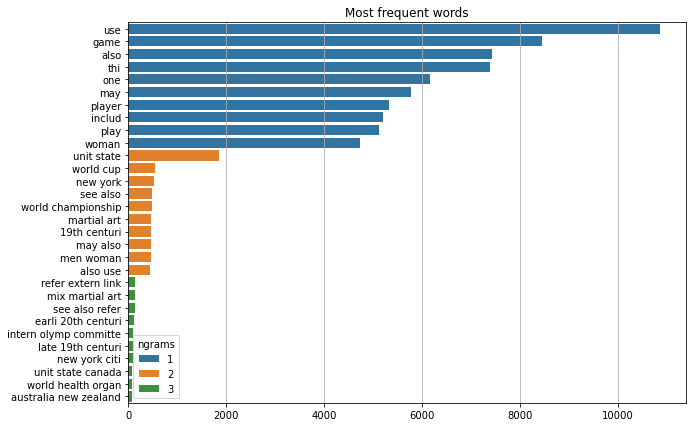

# Biology_and_health_sciences:


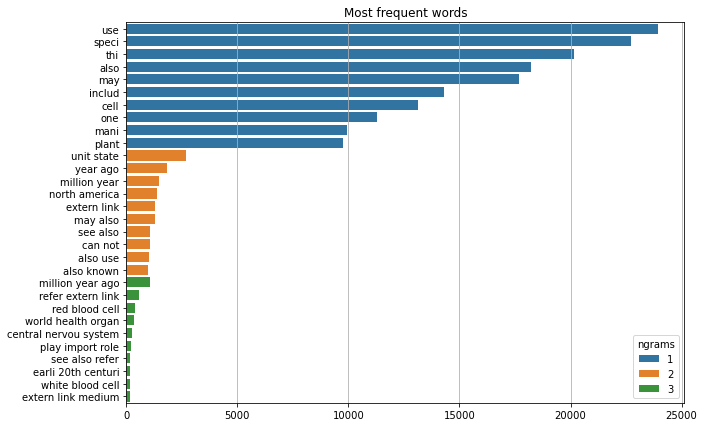

# Physical_sciences:


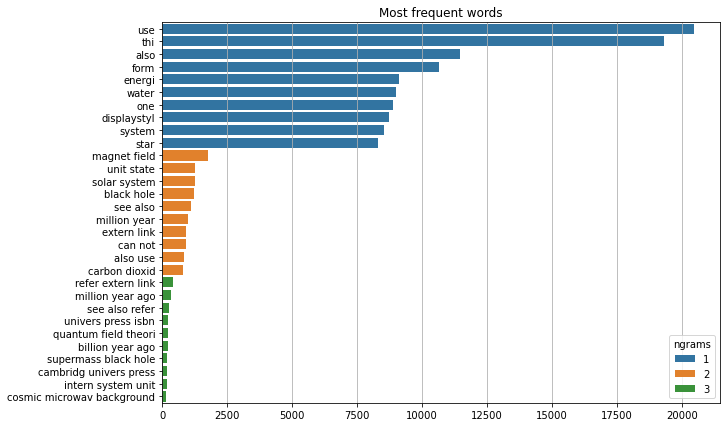

# Philosophy_and_religion:


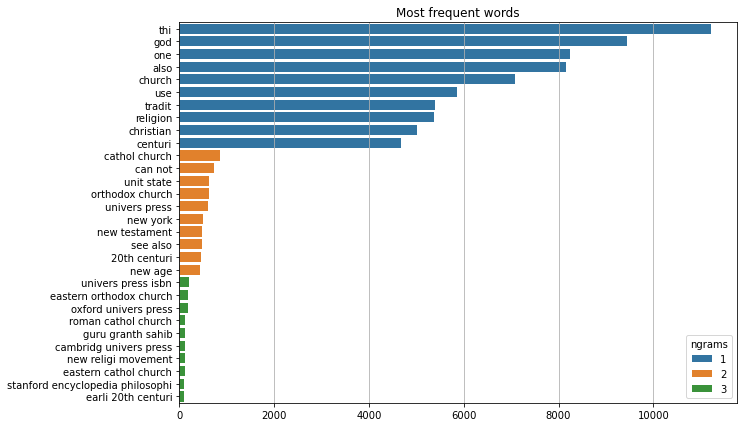

# History:


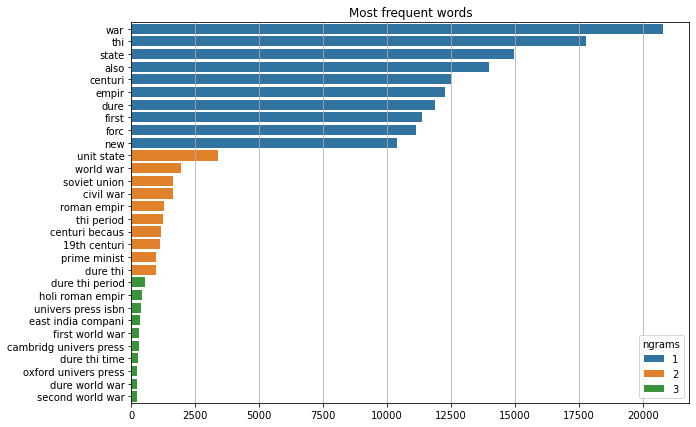

# Technology:


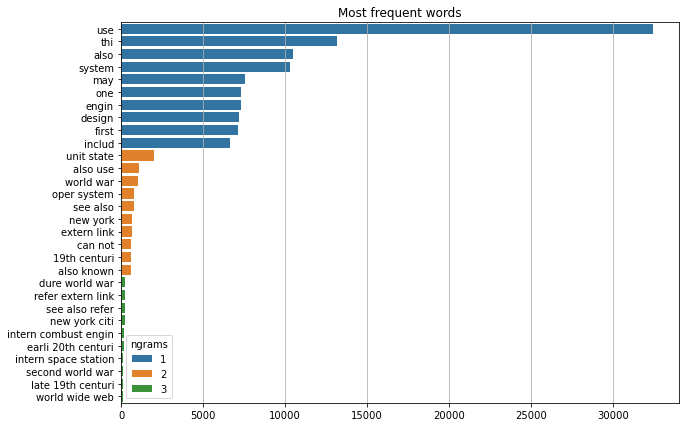

# Mathematics:


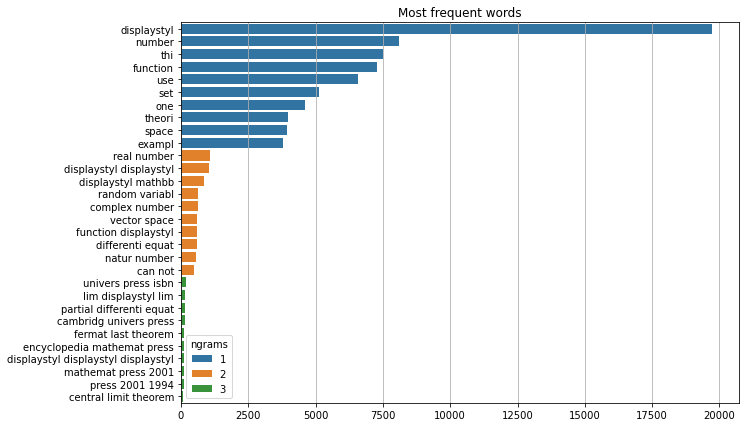

# Geography:


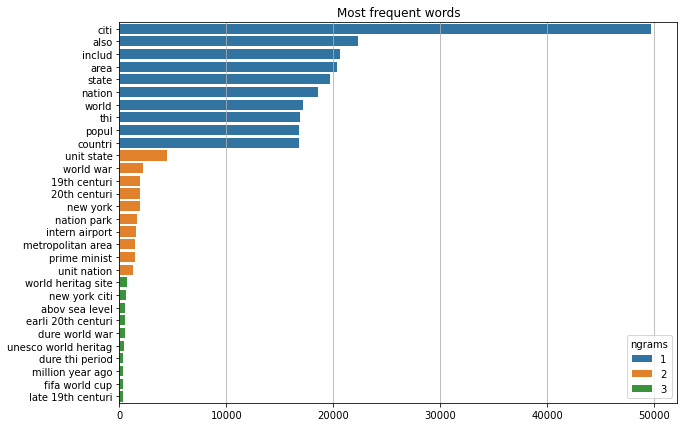

In [34]:
data_freq = pd.DataFrame()
for y in data["Category"].unique():
    print("# {}:".format(y))
    data_y = word_freq(corpus = data[data["Category"] == y]["Article_clean"], ngrams = [1,2,3], top = 10, figsize = (10,7))
    data_y["Category"] = y
    data_freq = data_freq.append(data_y)

In [35]:
data_freq.sample(5)

word  freq  ngrams                     Category
3024557     fight independ exil     1       3                      History
1359879             injuri 2008     1       2  Society_and_social_sciences
675771   hulubei french chemist     1       3            Physical_sciences
1045066         tower stockholm     1       2                   Technology
842275           punish harshli     1       2      Philosophy_and_religion

In [36]:
def plot_wordcloud(corpus, max_words=150, max_font_size = 35, figsize = (10,10)):
    wc = wordcloud.WordCloud(background_color = 'black', max_words = max_words, max_font_size = max_font_size)
    wc = wc.generate(str(corpus))   
    fig = plt.figure(num = 1, figsize = figsize)
    plt.axis('off')
    plt.imshow(wc, cmap = None)
    plt.show()

# People:


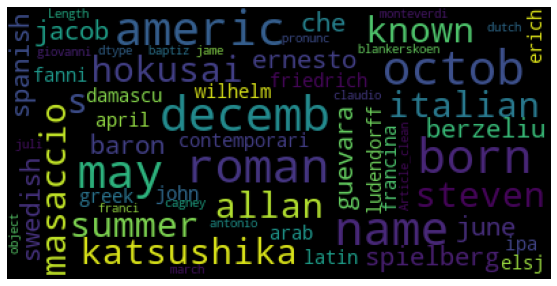

# Society_and_social_sciences:


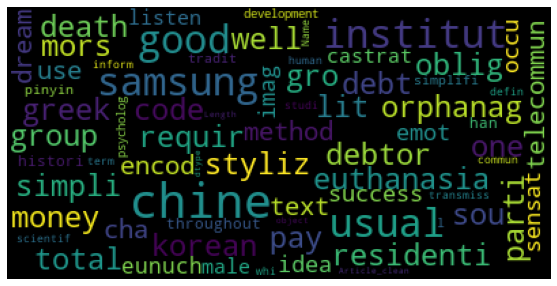

# Arts:


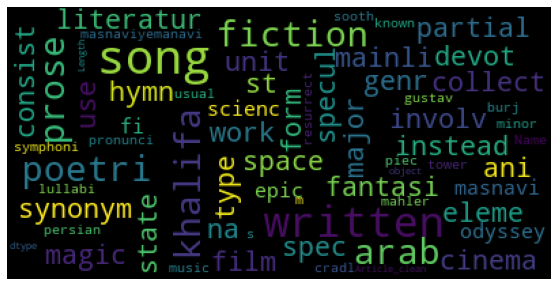

# Everyday_life:


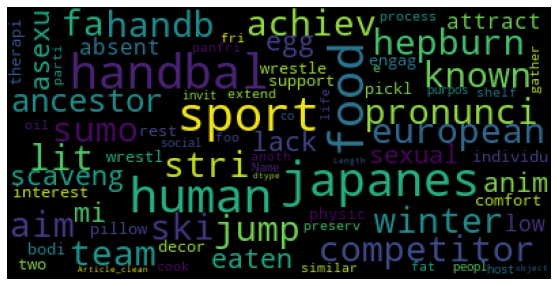

# Biology_and_health_sciences:


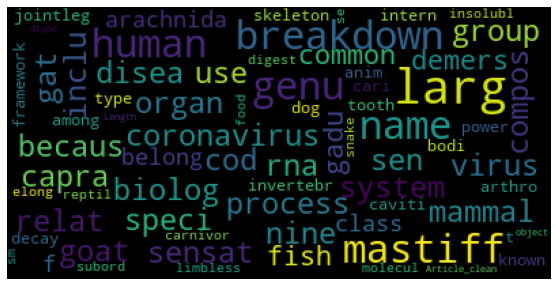

# Physical_sciences:


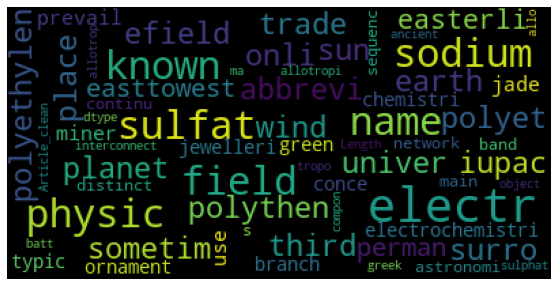

# Philosophy_and_religion:


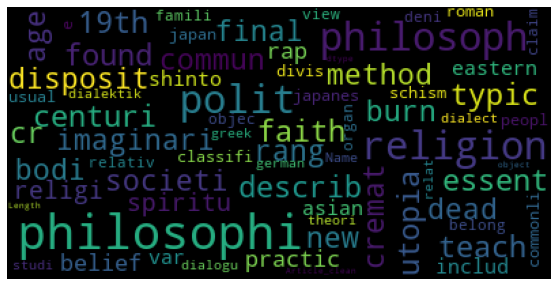

# History:


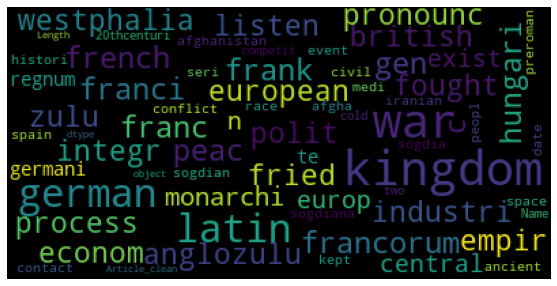

# Technology:


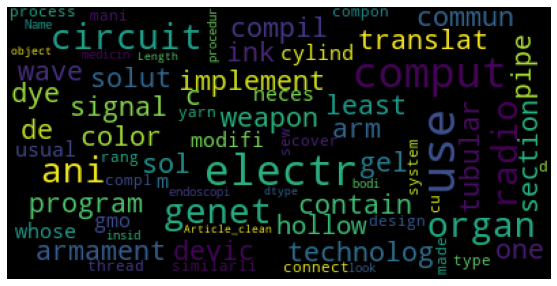

# Mathematics:


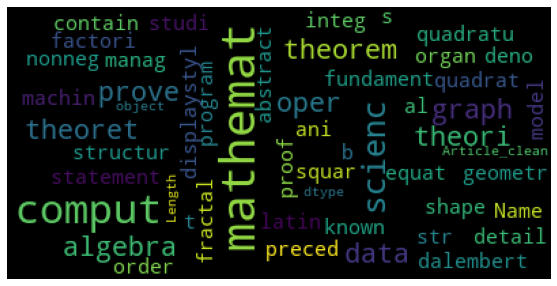

# Geography:


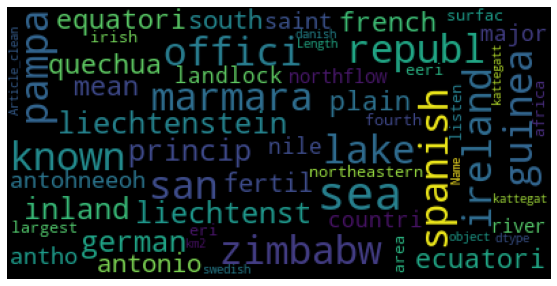

In [37]:
for y in data["Category"].unique():
    print("# {}:".format(y))
    plot_wordcloud(corpus = data[data["Category"] == y]["Article_clean"], max_words = 150, max_font_size = 35, figsize = (10,5))

In [38]:
def add_encode_variable(data, column):
    data[column+"_id"] = data[column].factorize(sort = True)[0]
    dic_class_mapping = dict( data[[column+"_id",column]].drop_duplicates().sort_values(column+"_id").values )
    return data, dic_class_mapping

In [39]:
# not necessary
data, dic_y_mapping = add_encode_variable(data, "Category")

print(dic_y_mapping)
data[["Category","Category_id"]].sample(5)

{0: 'Arts', 1: 'Biology_and_health_sciences', 2: 'Everyday_life', 3: 'Geography', 4: 'History', 5: 'Mathematics', 6: 'People', 7: 'Philosophy_and_religion', 8: 'Physical_sciences', 9: 'Society_and_social_sciences', 10: 'Technology'}


Category  Category_id
4343  Biology_and_health_sciences            1
3320                         Arts            0
8298                   Technology           10
7745                      History            4
4622  Biology_and_health_sciences            1

In [40]:
from sklearn.model_selection import train_test_split

def data_partitioning(data, y, categories, test_size = 0.3, shuffle = True):
    """
    This function performs data partitioning into train and test sets, with stratification by category.
    """
    # Partition data into train and test sets
    data_train, data_test = train_test_split(data, test_size = test_size, shuffle = shuffle, stratify = data['Category'])
    
    # Print category-specific statistics
    print("Category:")
    for category in categories:
        if category in data_train['Category'].unique() and category in data_test['Category'].unique():
            train_frac = data_train['Category'].value_counts(normalize = True)[category]
            test_frac = data_test['Category'].value_counts(normalize = True)[category]
            print(f" {category} --> train: {train_frac:.2f} | test: {test_frac:.2f}")
    
    # Print feature information
    print(f"{data_train.shape[1]-1} features: {data_train.drop(y, axis = 1).columns.to_list()}")
    
    return data_train, data_test

In [41]:
categories = ["People", "Arts", "History", "Biology_and_health_sciences", "Everyday_life", "Geography", "Philosophy_and_religion", "Society_and_social_sciences"]

In [42]:
data_train, data_test = data_partitioning(data, "Category", categories, test_size = 0.2, shuffle=True)

Category:
 People --> train: 0.20 | test: 0.20
 Arts --> train: 0.07 | test: 0.07
 History --> train: 0.07 | test: 0.07
 Biology_and_health_sciences --> train: 0.15 | test: 0.15
 Everyday_life --> train: 0.05 | test: 0.05
 Geography --> train: 0.12 | test: 0.12
 Philosophy_and_religion --> train: 0.04 | test: 0.04
 Society_and_social_sciences --> train: 0.09 | test: 0.09
24 features: ['Title', 'Article', 'Summary', 'Article_clean', 'Summary_clean', 'lang', 'Summary_tagged', 'tags', 'tags_PERSON', 'tags_PRODUCT', 'tags_EVENT', 'tags_LOC', 'tags_GPE', 'tags_FAC', 'tags_ORG', 'tags_NORP', 'tags_WORK_OF_ART', 'word_count', 'char_count', 'sentence_count', 'avg_word_length', 'avg_sentence_lenght', 'sentiment', 'Category_id']


In [43]:
y_train = data_train["Category"].values
y_test = data_test["Category"].values

In [44]:
len(y_train)

8007

In [45]:
len(y_test)

2002

In [46]:
# Tf-Idf (advanced variant of BoW)
vectorizer = feature_extraction.text.TfidfVectorizer(max_features = 100000, ngram_range = (1,2), lowercase = False)

In [47]:
def fit_bow(corpus, vectorizer = None, vocabulary = None):
    ## vectorizer
    vectorizer = feature_extraction.text.TfidfVectorizer(max_features = None, ngram_range = (1,1), vocabulary = vocabulary) if vectorizer is None else vectorizer
    vectorizer.fit(corpus)
    
    ## sparse matrix
    print("--- creating sparse matrix ---")
    X = vectorizer.transform(corpus)
    print("shape:", X.shape)
    
    ## vocabulary
    print("--- creating vocabulary ---") if vocabulary is None else print("--- used vocabulary ---")
    dic_vocabulary = vectorizer.vocabulary_   #{word:idx for idx, word in enumerate(vectorizer.get_feature_names())}
    print(len(dic_vocabulary), "words")
    
    ## text2tokens
    print("--- tokenization ---")
    tokenizer = vectorizer.build_tokenizer()
    preprocessor = vectorizer.build_preprocessor()
    lst_text2tokens = []
    for text in corpus:
        lst_tokens = [dic_vocabulary[word] for word in tokenizer(preprocessor(text)) if word in dic_vocabulary]
        lst_text2tokens.append(lst_tokens)
    print(len(lst_text2tokens), "texts")
    
    ## plot heatmap
    fig, ax = plt.subplots(figsize=(15,5))
    sns.heatmap(X.todense()[:,np.random.randint(0,X.shape[1],100)] == 0, vmin = 0, vmax = 1, cbar = False, ax = ax).set_title('Sparse Matrix Sample')
    plt.show()
    return {"X":X, "lst_text2tokens":lst_text2tokens, "vectorizer":vectorizer, "dic_vocabulary":dic_vocabulary, "X_names":vectorizer.get_feature_names()}


--- creating sparse matrix ---
shape: (8007, 100000)
--- creating vocabulary ---
100000 words
--- tokenization ---
8007 texts


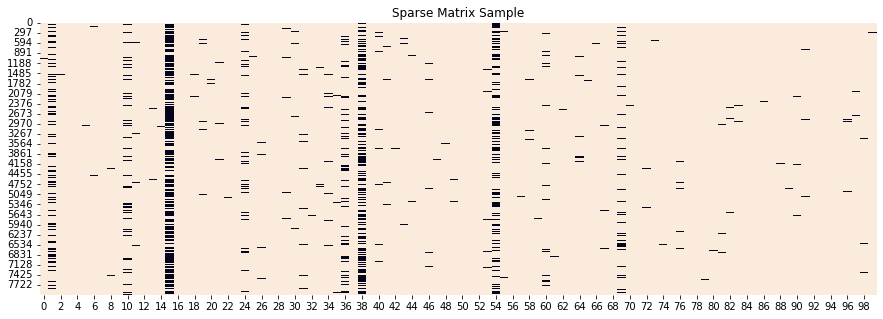

In [48]:
dic_bow = fit_bow(corpus = data_train["Article_clean"], vectorizer = vectorizer, vocabulary = None)

X_train, X_names, vectorizer, dic_vocabulary, lst_text2tokens = dic_bow["X"], dic_bow["X_names"], dic_bow["vectorizer"], dic_bow["dic_vocabulary"], dic_bow["lst_text2tokens"]

In [49]:
# check some features
f_range = (500, 505)

print("fetures name (from dic_vocabulary):")
print({k:v for k,v in sorted(dic_vocabulary.items(), key = lambda item:item[1], reverse = False)
      if v in np.arange(f_range[0], f_range[1]+1, step=1)})

print("")
print("value of these features (in the sparse matrix) for the first text:")
print(vectorizer.get_feature_names()[f_range[0]:f_range[1]])
print(X_train[0, f_range[0]:f_range[1]].todense())

fetures name (from dic_vocabulary):
{'13yearold': 500, '140': 501, '140 million': 502, '1400': 503, '1400 becaus': 504, '14000': 505}

value of these features (in the sparse matrix) for the first text:
['13yearold', '140', '140 million', '1400', '1400 becaus']
[[0. 0. 0. 0. 0.]]


In [50]:
# check text conversion
i = 0

## list of text: ["I like this", ...]
len_txt = len(data_train["Article_clean"].iloc[i].split())
print("from: ", data_train["Article_clean"].iloc[i], "| len:", len_txt)

## list of token ids: [[1, 2, 3], ...]
len_tokens = len(lst_text2tokens[i])
print("to: ", lst_text2tokens[i], "| len:", len(lst_text2tokens[i]))

## vocabulary: {"I":1, "like":2, "this":3, ...}
print("check: ", data_train["Article_clean"].iloc[i].split()[0], " -- idx in vocabulary -->", 
      dic_vocabulary[data_train["Article_clean"].iloc[i].split()[0]])

## words not in vocabulary?
if len_txt-len_tokens != 0:
    missing_words = [word for word in data_train["Article_clean"].iloc[i].split() if word not in dic_vocabulary.keys()]
    print("!!!", len_txt-len_tokens, "words not in vocabulary:", missing_words)

from:  disgust middl french desgoust latin gustu tast emot respons reject revuls someth potenti contagi someth consid offens distast unpleas express emot man anim charl darwin wrote disgust sensat refer someth revolt disgust experienc primarili relat sen tast either perceiv imagin secondarili anyth caus similar feel sen smell touch vision music sensit peopl may even disgust cacophoni inharmoni sound research continu proven relationship disgust anxieti disord arachnophobia bloodinjectioninjuri type phobia contamin fear relat obsessivecompuls disord also known ocd disgust one basic emot robert plutchik theori emot studi extens paul rozin invok characterist facial express one paul ekman six univers facial express emot unlik emot fear anger sad disgust associ decreas heart rate evolutionari signific believ emot disgust evolv respons offens food may caus harm organ common exampl thi found human show disgust reaction mouldi milk contamin meat disgust appear trigger object peopl posse attribu

In [51]:
def features_selection(X, y, X_names, top = None, print_top = 10):    
    ## selection
    data_features = pd.DataFrame()
    for cat in np.unique(y):
        chi2, p = feature_selection.chi2(X, y==cat)
        data_features = data_features.append(pd.DataFrame({"feature":X_names, "Score":1-p, "Category":cat}))
    data_features = data_features.sort_values(["Category","Score"], ascending=[True,False])
    data_features = data_features[data_features["Score"] > 0.95] #p-value filter
    if top is not None:
        data_features = data_features.groupby('Category')["Category","feature","Score"].head(top)
    
    ## print
    print("features selection: from", "{:,.0f}".format(len(X_names)), 
          "to", "{:,.0f}".format(len(data_features["feature"].unique())))
    print(" ")
    for cat in np.unique(y):
        print("# {}:".format(cat))
        print("  . selected features:", len(data_features[data_features["Category"] == cat]))
        print("  . top features:", ", ".join(data_features[data_features["Category"] == cat]["feature"].values[:print_top]))
        print(" ")
    return data_features["feature"].unique().tolist(), data_features

In [52]:
X_names, data_selection = features_selection(X_train, data_train["Category"], X_names, top = None, print_top = 10)

features selection: from 100,000 to 9,739
 
# Arts:
  . selected features: 739
  . top features: art, film, music, paint, artist, instrument, genr, danc, novel, style
 
# Biology_and_health_sciences:
  . selected features: 1515
  . top features: cell, genu, plant, speci, genus, protein, tissu, flower, infect, diseas
 
# Everyday_life:
  . selected features: 629
  . top features: ball, game, player, sport, olymp, ski, sauc, bowl, tournament, sexual
 
# Geography:
  . selected features: 1098
  . top features: citi, island, lake, river, sea, airport, park, district, mountain, strait
 
# History:
  . selected features: 862
  . top features: empir, war, armi, dynasti, ottoman, kingdom, defeat, byzantin, troop, alli
 
# Mathematics:
  . selected features: 1331
  . top features: algebra, algorithm, axiom, calculu, complex number, displaystyl, displaystyl displaystyl, displaystyl mathbb, equat, euclidean
 
# People:
  . selected features: 394
  . top features: career, father, work, award, marr

In [53]:
data_selection.sample(5)

feature     Score           Category
77752  scalar multipl  0.998583        Mathematics
10367           bandi  0.999777      Everyday_life
73709     refer frame  0.999596  Physical_sciences
32764    field ration  0.993858        Mathematics
15037           caral  0.997087            History

--- creating sparse matrix ---
shape: (8007, 9739)
--- used vocabulary ---
9739 words
--- tokenization ---
8007 texts


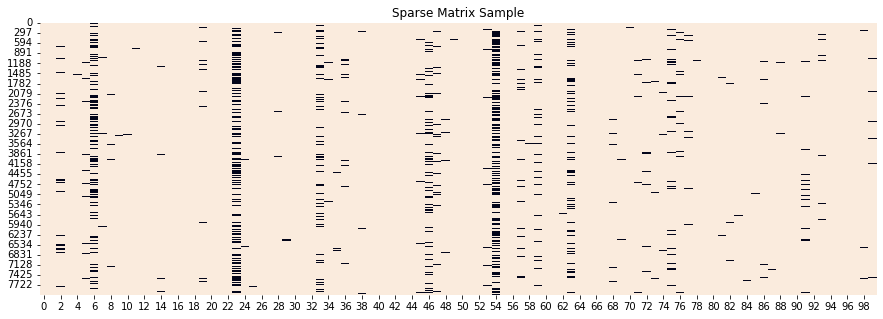

In [54]:
# Recreate Vectorizer with the selected vocabulary
dic_bow = fit_bow(corpus = data_train["Article_clean"], vocabulary = X_names)

X_train, X_names, vectorizer, dic_vocabulary, lst_text2tokens = dic_bow["X"], dic_bow["X_names"], dic_bow["vectorizer"], dic_bow["dic_vocabulary"], dic_bow["lst_text2tokens"]

In [55]:
def sparse2data(X, dic_vocabulary, X_names, prefix = ""):
    data_X = pd.DataFrame()
    for word in X_names:
        idx = dic_vocabulary[word]
        data_X[prefix+word] = np.reshape(X[:,idx].toarray(), newshape = (-1))
    return data_X

In [56]:
# Explore the sparse matrix as data
data_X_train = sparse2data(X_train, dic_vocabulary, X_names, prefix = "")

In [57]:
data_X_train = pd.concat([data_train[["Article_clean","Category"]], data_X_train.set_index(data_train.index)], axis = 1)
data_X_train.head()

Article_clean  \
2375  disgust middl french desgoust latin gustu tast...   
3927  game structur form play usual undertaken enter...   
9070  japan japanes nippon nihon formal nihonkoku is...   
7015  elijah hebrew roman mean god yahwehyhwh greek ...   
967   giordano bruno italian latin iordanu brunu nol...   

                         Category       art      film     music     paint  \
2375  Society_and_social_sciences  0.001480  0.001739  0.003595  0.000000   
3927                Everyday_life  0.010282  0.000000  0.000000  0.000000   
9070                    Geography  0.023877  0.017536  0.021758  0.003990   
7015      Philosophy_and_religion  0.004143  0.001217  0.000000  0.001385   
967                        People  0.102483  0.000000  0.010377  0.000000   

        artist  instrument      genr      danc  ...  ceil  cannula  \
2375  0.000000    0.005823  0.000000  0.002354  ...   0.0      0.0   
3927  0.003253    0.000000  0.031775  0.000000  ...   0.0      0.0   
9070  0.000000    0.007831  0.005271  0.004748  ...   0.0      0.0   
7015  0.000000    0.000000  0.000000  0.000000  ...   0.0      0.0   
967   0.010808    0.000000  0.000000  0.000000  ...   0.0      0.0   

      engin gener      deck  oilbas  opensourc softwar  orchard  hand tool  \
2375          0.0  0.000000     0.0                0.0      0.0        0.0   
3927          0.0  0.056827     0.0                0.0      0.0        0.0   
9070          0.0  0.000000     0.0                0.0      0.0        0.0   
7015          0.0  0.000000     0.0                0.0      0.0        0.0   
967           0.0  0.000000     0.0                0.0      0.0        0.0   

      engin disciplin  industri robot  
2375              0.0             0.0  
3927              0.0             0.0  
9070              0.0             0.0  
7015              0.0             0.0  
967               0.0             0.0  

[5 rows x 9741 columns]

In [58]:
classifier = naive_bayes.MultinomialNB()

In [59]:
# Take the raw text for X_test and will be transformed/predicted by the pipeline
X_test = data_test["Summary_clean"].values

In [60]:
def fit_ml_classif(X_train, y_train, X_test, vectorizer = None, classifier = None): 
    ## model pipeline
    vectorizer = feature_extraction.text.TfidfVectorizer() if vectorizer is None else vectorizer
    classifier = naive_bayes.MultinomialNB() if classifier is None else classifier
    model = pipeline.Pipeline([("vectorizer",vectorizer), ("classifier",classifier)])
    
    ## train
    if vectorizer is None:
        model.fit(X_train, y_train)
    else:
        model["classifier"].fit(X_train, y_train)
    
    ## test
    predicted = model.predict(X_test)
    predicted_prob = model.predict_proba(X_test)
    return model, predicted_prob, predicted


In [61]:
model, predicted_prob, predicted = fit_ml_classif(X_train, y_train, X_test, vectorizer, classifier)

In [62]:
def evaluate_multi_classif(y_test, predicted, predicted_prob, figsize=(15,5)):
    classes = np.unique(y_test)
    y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
    ## Accuracy, Precision, Recall
    accuracy = metrics.accuracy_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, predicted_prob, multi_class="ovr")
    print("Accuracy:",  round(accuracy,2))
    print("Auc:", round(auc,2))
    print("Detail:")
    print(metrics.classification_report(y_test, predicted))
    
    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    ## Plot roc
    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i], predicted_prob[:,i])
        ax[0].plot(fpr, tpr, lw=3, label='{0} (area={1:0.2f})'.format(classes[i], metrics.auc(fpr, tpr)))
    ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], xlabel='False Positive Rate', 
              ylabel="True Positive Rate (Recall)", title="Receiver operating characteristic")
    ax[0].legend(loc="lower right")
    ax[0].grid(True)
    
    ## Plot precision-recall curve
    for i in range(len(classes)):
        precision, recall, thresholds = metrics.precision_recall_curve(y_test_array[:,i], predicted_prob[:,i])
        ax[1].plot(recall, precision, lw=3, label='{0} (area={1:0.2f})'.format(classes[i], metrics.auc(recall, precision)))
    ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', ylabel="Precision", title="Precision-Recall curve")
    ax[1].legend(loc="best")
    ax[1].grid(True)
    plt.show()


Accuracy: 0.62
Auc: 0.96
Detail:
                             precision    recall  f1-score   support

                       Arts       1.00      0.05      0.10       134
Biology_and_health_sciences       0.77      0.92      0.84       296
              Everyday_life       1.00      0.04      0.08        95
                  Geography       0.67      0.96      0.79       241
                    History       0.70      0.19      0.30       137
                Mathematics       1.00      0.25      0.40        60
                     People       0.44      0.93      0.60       399
    Philosophy_and_religion       0.86      0.07      0.13        87
          Physical_sciences       0.75      0.84      0.79       220
Society_and_social_sciences       0.82      0.32      0.46       185
                 Technology       0.82      0.39      0.53       148

                   accuracy                           0.62      2002
                  macro avg       0.80      0.45      0.46      2002

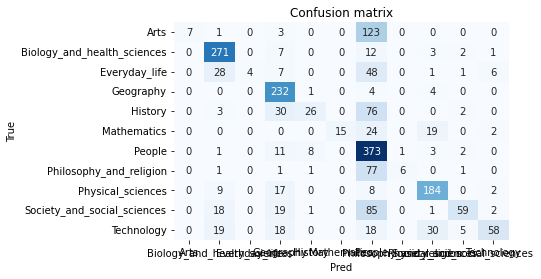

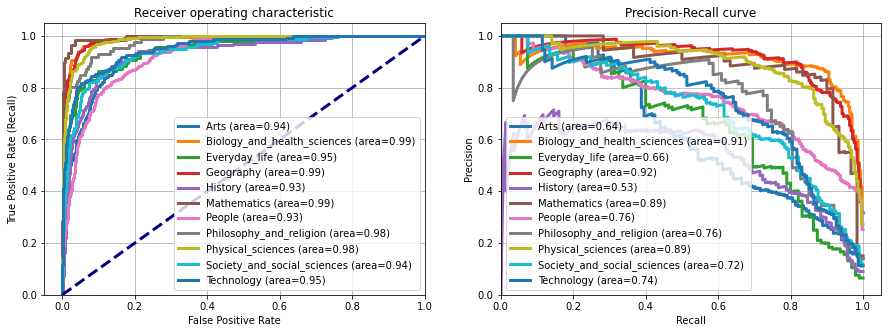

In [63]:
evaluate_multi_classif(y_test, predicted, predicted_prob, figsize = (15,5))

In [64]:
def explainer_lime(model, y_train, txt_instance, top = 10):
    explainer = lime_text.LimeTextExplainer(class_names = np.unique(y_train))
    explained = explainer.explain_instance(txt_instance, model.predict_proba, num_features = top) 
    explained.show_in_notebook(text=txt_instance, predict_proba = False)
    data_explainer = pd.DataFrame(explained.as_list(), columns = ['feature','effect'])
    return data_explainer

In [65]:
i = 10
print("True:", y_test[i], "--> Pred:", predicted[i], "| Prob:", round(np.max(predicted_prob[i]),2))
print(" ")
exp = explainer_lime(model, y_train, txt_instance = data_test["Summary_clean"].iloc[i], top=3)

True: Physical_sciences --> Pred: Physical_sciences | Prob: 0.86
 
